
# Predicting house price using machine learning
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting house prices in delhi.

It is intended to be an end-to-end example of what a data science and machine learning proof of concept might look like.

We're going to take the following approach:

* Problem definition

* Data

* Evaluation

* Features

* Modelling

* Experimentation


# What we'll end up with
Since we already have a dataset, we'll approach the problem with the following machine learning modelling framework.

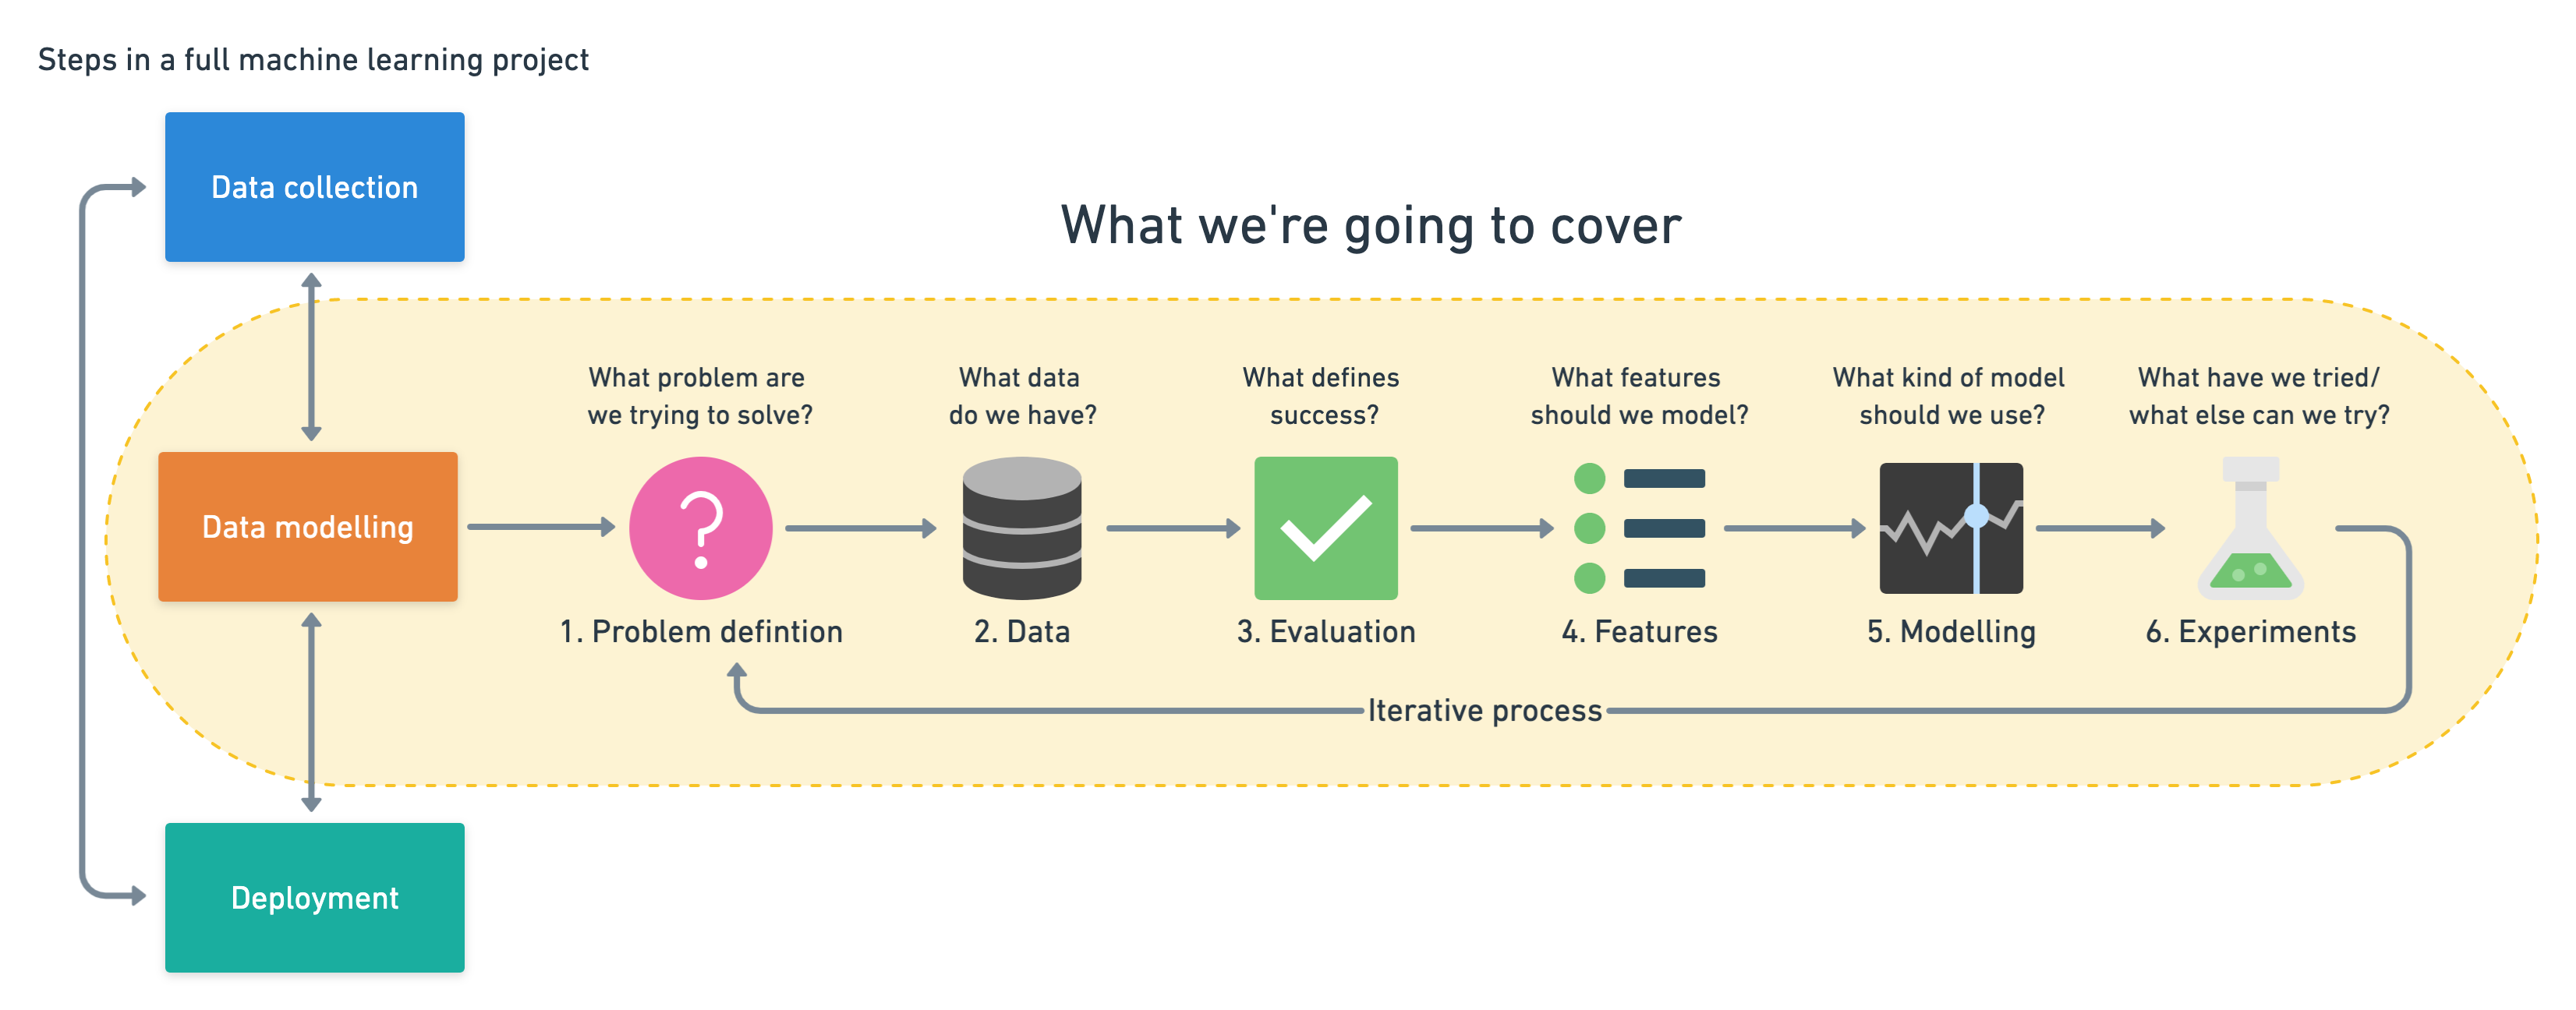

# More specifically, we'll look at the following topics.

**Exploratory data analysis (EDA)** - the process of going through a dataset and finding out more about it.

**Model training** - create model(s) to learn to predict a target variable based on other variables.

**Model evaluation** - evaluating a models predictions using problem-specific evaluation metrics.

**Model comparison** - comparing several different models to find the best one.

**Model fine-tuning** - once we've found a good model, how can we improve it?

**Feature importance** - since we're predicting the presence of heart disease, are there some things which are more important for prediction?

# 1. Problem Definition
Dataset consists of 12 columns and 1259 rows. 6 of the features are numerical valued and rest are categorical. 

The Data has been extracted from MagicBricks (a website, provides common platform to property buyer and seller ).


# 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://www.magicbricks.com/Property-Rates-Trends/ALL-RESIDENTIAL-rates-in-New-Delhi

There is also a version of it available on Kaggle. https://www.kaggle.com/neelkamal692/delhi-house-price-prediction

Attributes and features are also referred to as independent variables and a target variable can be referred to as a dependent variable.

We use the independent variables to predict our dependent variable.

# 3. Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

# 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Area** --Area of the Property in square feet

**BHK** --
No. of Bedrooms along with 1 Hall and 1 kitchen

**Bathroom** --
No. of Bathrooms

**Furnishing** --
Whether listed property is furnished , unfurnished or semi furnished

**Locality** --
Locality in which property lies

**Parking** --
No. of parking available

**Price** --
This is the Price of property in INR

**Status** --
property's status as in 'ready to move' or still under construction

**Transaction** --
Its a new property or being re-sold

**Type** --
Its an Apartment or Builder Floor



# Preparing the tools
At the start of any project, it's custom to see the required libraries imported in a big chunk like you can see below.

However, in practice, your projects may import libraries as you go. After you've spent a couple of hours working on your problem, you'll probably want to do some tidying up. This is where you may want to consolidate every library you've used at the top of your notebook (like the cell below).

The libraries you use will differ from project to project. But there are a few which will you'll likely take advantage of during almost every structured data project.

[pandas](https://pandas.pydata.org/) for data analysis.

[NumPy](https://numpy.org/) for numerical operations.

[Matplotlib/seaborn](https://matplotlib.org/) for plotting or data visualization.

[Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.


In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


# Load Data
There are many different kinds of ways to store data. The typical way of storing tabular data, data similar to what you'd see in an Excel file is in .csv format. .csv stands for comma seperated values.

Pandas has a built-in function to read .csv files called read_csv() which takes the file pathname of your .csv file. You'll likely use this a lot.

In [3]:
df=pd.read_csv('MagicBricks.csv')

In [4]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1259 rows and 11 columns



# Data Exploration (exploratory data analysis or EDA)
Once you've imported a dataset, the next step is to explore. There's no set way of doing this. But what you should be trying to do is become more and more familiar with the dataset.

Compare different columns to each other, compare them to the target variable. Refer back to your data dictionary and remind yourself of what different columns mean.

Your goal is to become a subject matter expert on the dataset you're working with. So if someone asks you a question about it, you can give them an explanation and when you start building models, you can sound check them to make sure they're not performing too well (overfitting) or why they might be performing poorly (underfitting).

Let's take a quick look at what the data looks like:

In [5]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


Another way to get some quick insights on your dataframe is to use df.describe(). describe() shows a range of different metrics about your numerical columns such as mean, max and standard deviation.

In [6]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [8]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

**Explored Area data**

<AxesSubplot:xlabel='Price', ylabel='Area'>

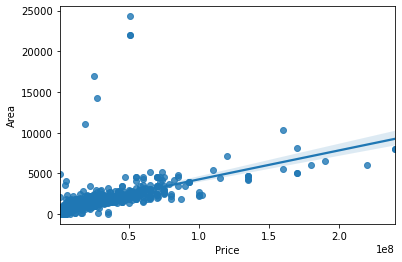

In [9]:
#Create a regression plot with area and price
sns.regplot(y='Area',x='Price',data=df)

C:\Users\Vivek Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


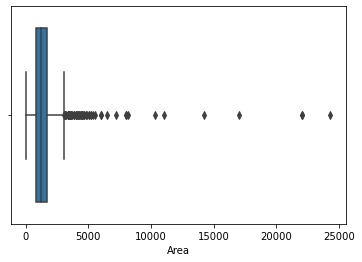

In [10]:
#Barplot of Area
sns.boxplot(df["Area"])
plt.show()

C:\Users\Vivek Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


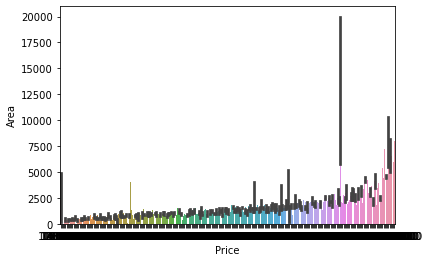

In [11]:
#Barplot of price and area
sns.barplot(df["Price"],df['Area'])
plt.show()


C:\Users\Vivek Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


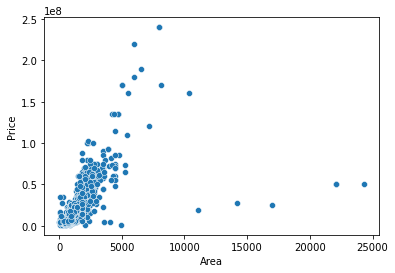

In [12]:
#Scatter plot of area and price
sns.scatterplot(df["Area"],df['Price'])
plt.show()

**Explored BHK data**

<AxesSubplot:xlabel='Price', ylabel='BHK'>

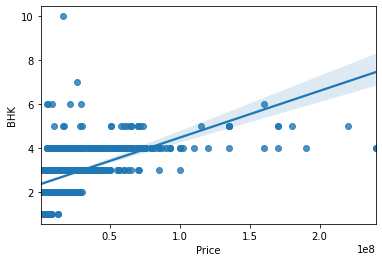

In [13]:
sns.regplot(y='BHK',x='Price',data=df)

C:\Users\Vivek Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


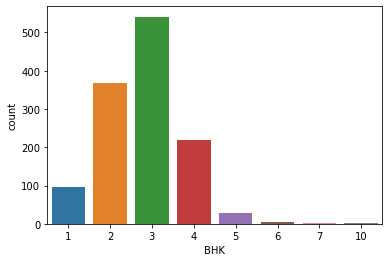

In [14]:
#Bar graph of BHK
sns.countplot(df["BHK"])
plt.show()

**Explored Bathroom data**

In [15]:
df['Bathroom'].value_counts()

2.0    551
3.0    355
1.0    146
4.0    138
5.0     57
6.0      7
7.0      3
Name: Bathroom, dtype: int64

C:\Users\Vivek Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


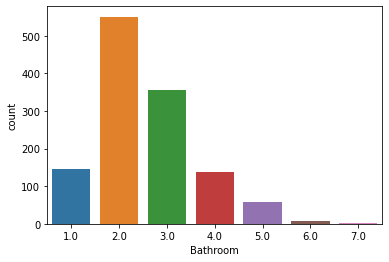

In [16]:
#Count Bar graph of Bathroom
sns.countplot(df["Bathroom"])
plt.show()

**Explored Transcation data**

In [17]:
df['Transaction'].value_counts()

Resale          781
New_Property    478
Name: Transaction, dtype: int64

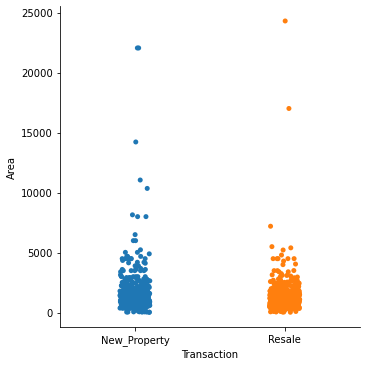

In [18]:
#Catplot of Transcation and Area
sns.catplot(x="Transaction", y="Area", data=df)


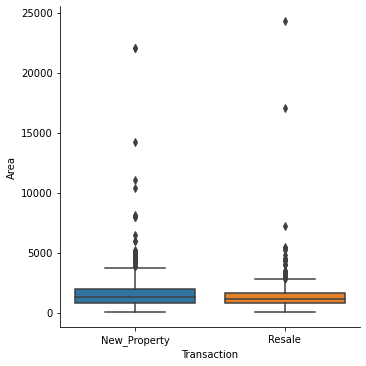

In [19]:
sns.catplot(x="Transaction", y="Area", kind="box", data=df)


**Explored Status data**

In [20]:
df['Status'].value_counts()

Ready_to_move    1184
Almost_ready       75
Name: Status, dtype: int64

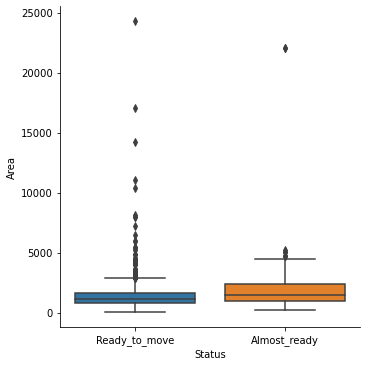

In [21]:
sns.catplot(x="Status", y="Area", kind="box", data=df)

**Explored Furnishing data**

In [22]:
df['Furnishing'].value_counts()

Semi-Furnished    708
Unfurnished       363
Furnished         183
Name: Furnishing, dtype: int64

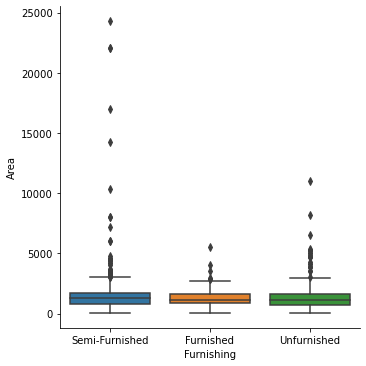

In [23]:
sns.catplot(x="Furnishing", y="Area", kind="box", data=df)

**Explored Type data**

In [24]:
df['Type'].value_counts()

Builder_Floor    661
Apartment        593
Name: Type, dtype: int64

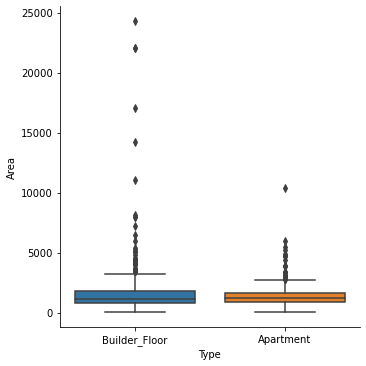

In [25]:
sns.catplot(x="Type", y="Area", kind="box", data=df)

**Explored Locality data**

In [26]:
df['Locality'].value_counts()

Lajpat Nagar 3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    34
Lajpat Nagar 2                                                                                                                                                                                                                                                                                                                                                                                                                                                     

C:\Users\Vivek Kumar\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


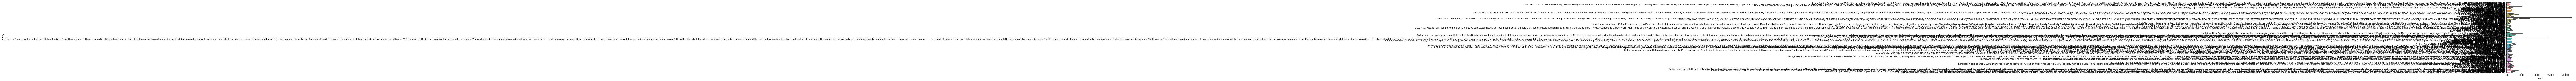

In [27]:
sns.catplot(x="Area", y="Locality", kind="bar", data=df)


# 5. Modelling
We've explored our dataset a little as well as enriched it with some datetime attributes, now let's try to model.

If we can reach 80% accuracy at predicting the price of house.

In [28]:
area_df=df['Area'].value_counts().head(40)
# Areas that occured atleast 10 times are taken:--

area_df

900.0     67
1500.0    50
1800.0    48
1000.0    42
1600.0    38
1350.0    35
1100.0    32
1400.0    30
450.0     29
1200.0    28
1700.0    26
1300.0    25
800.0     25
850.0     21
750.0     21
950.0     19
1150.0    18
540.0     17
1450.0    16
810.0     15
700.0     15
500.0     14
1250.0    14
2000.0    13
600.0     12
720.0     11
1050.0    11
1550.0    11
405.0     10
350.0     10
4500.0    10
2200.0    10
2700.0    10
2250.0    10
650.0     10
550.0     10
675.0      9
1650.0     8
2100.0     8
990.0      8
Name: Area, dtype: int64

C:\Users\Vivek Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Area', ylabel='Density'>

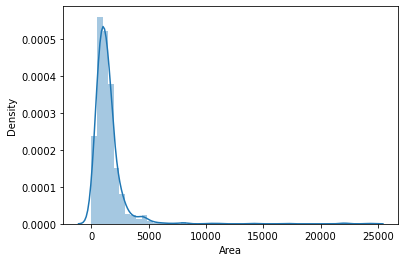

In [29]:
sns.distplot(df['Area'])

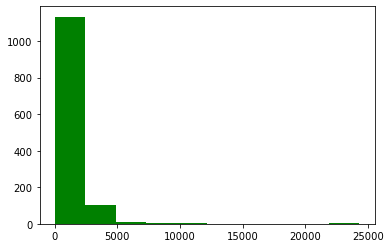

In [30]:
plt.hist(df["Area"],color='green')
plt.show()

Droping the BHK value of greater than 6

In [31]:
df[df['BHK']==6]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
163,4050.0,6,3.0,Furnished,Budh Vihar Phase 1,1.0,5100000,Ready_to_move,Resale,Builder_Floor,1259.0
164,2400.0,6,4.0,Furnished,Budh Vihar Phase 2,1.0,6000000,Ready_to_move,Resale,Builder_Floor,2500.0
261,2800.0,6,4.0,Semi-Furnished,"Taimoor Enclave, New Friends Colony carpet are...",2.0,29500000,Ready_to_move,Resale,Apartment,15459.0
352,324.0,6,3.0,Furnished,"Yamuna Vihar, Shahdara",1.0,8700000,Ready_to_move,Resale,Builder_Floor,35714.0
353,720.0,6,5.0,Furnished,"Yamuna Vihar, Shahdara",1.0,22000000,Ready_to_move,Resale,Builder_Floor,35714.0
585,5500.0,6,7.0,Furnished,Safdarjung Enclave,1.0,160000000,Ready_to_move,Resale,Apartment,14818.0


In [32]:
df.drop([721,345,163,164,261,352,353,585],inplace=True)

C:\Users\Vivek Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bathroom', ylabel='count'>

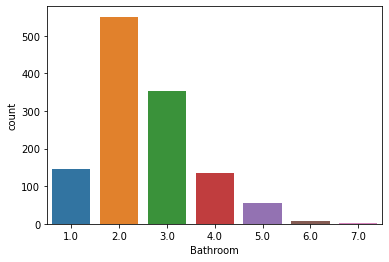

In [33]:
sns.countplot(df['Bathroom'])

In [34]:
df[df['Bathroom']==6]


,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
225,5025.0,5,6.0,Unfurnished,Greater Kailash 2,4.0,170000000,Almost_ready,New_Property,Builder_Floor,22222.0
495,5025.0,5,6.0,Unfurnished,Greater Kailash 2,4.0,170000000,Almost_ready,New_Property,Builder_Floor,22222.0
527,810.0,5,6.0,Furnished,Geeta Colony,1.0,28900000,Ready_to_move,Resale,Apartment,6667.0
659,3050.0,5,6.0,Semi-Furnished,Commonwealth Games Village 2010,NaN,62500000,Ready_to_move,Resale,Apartment,20492.0
676,3112.0,5,6.0,Semi-Furnished,Commonwealth Games Village 2010,3.0,60000000,Ready_to_move,Resale,Apartment,19280.0
681,2300.0,5,6.0,Semi-Furnished,"Common Wealth Games Village, Commonwealth Game...",3.0,58000000,Ready_to_move,Resale,Apartment,21311.0
1211,4350.0,4,6.0,Semi-Furnished,"Orchid Metropolis, Hauz Khas",2.0,135000000,Ready_to_move,New_Property,Apartment,170000.0


Droping the Bathroom value of greater than 6 and filling the missing value

In [35]:
df.drop([225,495,527,659,676,681,1211,248,1029],inplace=True)

In [36]:
df.Bathroom.fillna(df.Bathroom.median(),inplace=True)

In [37]:
# Check missing values
df.isnull().sum()

Area             0
BHK              0
Bathroom         0
Furnishing       5
Locality         0
Parking         32
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       240
dtype: int64


# Fill missing values
From our experience with machine learning models. We know two things:

* All of our data has to be numerical.
* There can't be any missing values.
* And as we've seen using df_tmp.isna().sum() our data still has plenty of missing values.

Filling the missing value of parking 

In [38]:
df.Parking.fillna(0,inplace=True)

C:\Users\Vivek Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parking', ylabel='count'>

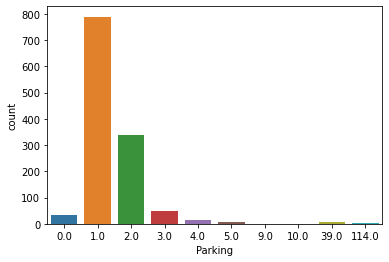

In [39]:
sns.countplot(df.Parking)


In [40]:
df['Parking'].replace([39,114],1,inplace=True)
df['Parking'].replace([5,9,10],4,inplace=True)

In [41]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         0
Furnishing       5
Locality         0
Parking          0
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       240
dtype: int64

In [42]:
new=df.drop_duplicates()

Make a compare in which we fill the value of Per_sqft 


In [43]:
compare=(new['Price']/new['Area'])-new['Per_Sqft']
compare

0                NaN
1          -0.333333
2        9648.789474
3         333.000000
4        2871.461538
            ...     
1254      439.998057
1255    -1011.238095
1256     7084.000000
1257    -1299.838384
1258   -11241.791855
Length: 1160, dtype: float64

In [44]:
compare.median()

0.22222222222262644

Fill the value of Per_Sqft

In [45]:
new['Per_Sqft']=new['Per_Sqft'].fillna(value=new['Price']/new['Area'] )

<ipython-input-45-67ed72085de1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Per_Sqft']=new['Per_Sqft'].fillna(value=new['Price']/new['Area'] )


In [46]:
new.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     5
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           5
Per_Sqft       0
dtype: int64

In [47]:
new['Furnishing'].value_counts()


Semi-Furnished    660
Unfurnished       328
Furnished         167
Name: Furnishing, dtype: int64

In [48]:
new['Type'].value_counts()

Builder_Floor    637
Apartment        518
Name: Type, dtype: int64

In [49]:
new[new['Furnishing'].isnull()]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
509,450.0,2,2.0,NaN,"Gandhi Nagar, Shahdara",0.0,2900000,Ready_to_move,Resale,NaN,58000.0
510,540.0,5,2.0,NaN,"Gandhi Nagar, Shahdara",0.0,17000000,Ready_to_move,Resale,NaN,58000.0
511,1350.0,3,3.0,NaN,"Gandhi Nagar, Shahdara",0.0,25000000,Ready_to_move,Resale,NaN,18519.0
512,2250.0,3,2.0,NaN,"Gandhi Nagar, Shahdara",0.0,10000000,Ready_to_move,Resale,NaN,4444.0
719,1500.0,3,2.0,NaN,"Sarita Vihar, Mathura Road carpet area 1500 sq...",1.0,13500000,Ready_to_move,Resale,NaN,9000.0


In [50]:
new[new['Type'].isnull()]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
509,450.0,2,2.0,NaN,"Gandhi Nagar, Shahdara",0.0,2900000,Ready_to_move,Resale,NaN,58000.0
510,540.0,5,2.0,NaN,"Gandhi Nagar, Shahdara",0.0,17000000,Ready_to_move,Resale,NaN,58000.0
511,1350.0,3,3.0,NaN,"Gandhi Nagar, Shahdara",0.0,25000000,Ready_to_move,Resale,NaN,18519.0
512,2250.0,3,2.0,NaN,"Gandhi Nagar, Shahdara",0.0,10000000,Ready_to_move,Resale,NaN,4444.0
719,1500.0,3,2.0,NaN,"Sarita Vihar, Mathura Road carpet area 1500 sq...",1.0,13500000,Ready_to_move,Resale,NaN,9000.0


In [51]:
#Sort the values by locality
new=new.sort_values(by='Locality',axis=0)

In [52]:
new

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
222,2700.0,4,3.0,Semi-Furnished,"APL Builder Floor, Greater Kailash 1",1.0,60000000,Ready_to_move,New_Property,Builder_Floor,22222.000000
642,1500.0,3,2.0,Semi-Furnished,"Aashirwaad Chowk, Dwarka",1.0,14900000,Ready_to_move,Resale,Apartment,9933.333333
645,1850.0,3,2.0,Semi-Furnished,"Aashirwaad Chowk, Dwarka",1.0,15500000,Ready_to_move,Resale,Apartment,8378.378378
648,1380.0,3,2.0,Semi-Furnished,"Aashirwaad Chowk, Dwarka",1.0,15000000,Ready_to_move,Resale,Apartment,10869.565217
637,1550.0,3,2.0,Semi-Furnished,"Aashirwaad Chowk, Dwarka",1.0,13200000,Ready_to_move,Resale,Apartment,8516.129032
...,...,...,...,...,...,...,...,...,...,...,...
342,850.0,3,2.0,Furnished,"Yamuna Vihar, Shahdara",1.0,5700000,Ready_to_move,Resale,Builder_Floor,6706.000000
336,713.0,2,2.0,Semi-Furnished,"Yamuna Vihar, Shahdara",1.0,6000000,Ready_to_move,New_Property,Builder_Floor,4444.000000
356,675.0,4,3.0,Furnished,"Yamuna Vihar, Shahdara",2.0,16000000,Ready_to_move,Resale,Builder_Floor,22857.000000
1010,540.0,2,1.0,Unfurnished,"Zakir Nagar, New Friends Colony",2.0,1500000,Ready_to_move,Resale,Builder_Floor,2778.000000


In [53]:
new.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     5
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           5
Per_Sqft       0
dtype: int64

Fill the Type and Furnishing values

In [54]:
new['Type']=new['Type'].fillna(method='bfill')

In [55]:
new['Furnishing']=new['Furnishing'].fillna(method='bfill')

In [56]:
new.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

# LABEL ENCODING:
To convert Furnishing, Status, Transaction and Type into Numerical Data

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
furnishing_encoder=LabelEncoder()
status_encoder=LabelEncoder()
transaction_encoder=LabelEncoder()
type_encoder=LabelEncoder()

In [59]:
#Convert them into string
new['Furnishing']=furnishing_encoder.fit_transform(new['Furnishing'].astype('str'))
new['Status']=status_encoder.fit_transform(new['Status'])
new['Transaction']=transaction_encoder.fit_transform(new['Transaction'])
new['Type']=type_encoder.fit_transform(new['Type'].astype('str'))


In [60]:
#Correlation of price
new.corr()['Price']

Area           0.583711
BHK            0.595857
Bathroom       0.722017
Furnishing     0.002079
Parking        0.371365
Price          1.000000
Status        -0.104444
Transaction   -0.217128
Type           0.146795
Per_Sqft       0.336078
Name: Price, dtype: float64

<AxesSubplot:>

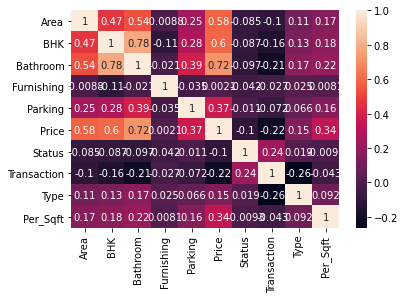

In [61]:
sns.heatmap(new.corr(),annot=True)

Well we can understand from both Correlation Chart and the above plot that Locality Column is Good for Nothing for Price-Prediction. "A correlation of 0.02 is nothing".

In [62]:
final= new.drop(columns=['Locality'])

In [63]:
final

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
222,2700.0,4,3.0,1,1.0,60000000,1,0,1,22222.000000
642,1500.0,3,2.0,1,1.0,14900000,1,1,0,9933.333333
645,1850.0,3,2.0,1,1.0,15500000,1,1,0,8378.378378
648,1380.0,3,2.0,1,1.0,15000000,1,1,0,10869.565217
637,1550.0,3,2.0,1,1.0,13200000,1,1,0,8516.129032
...,...,...,...,...,...,...,...,...,...,...
342,850.0,3,2.0,0,1.0,5700000,1,1,1,6706.000000
336,713.0,2,2.0,1,1.0,6000000,1,0,1,4444.000000
356,675.0,4,3.0,0,2.0,16000000,1,1,1,22857.000000
1010,540.0,2,1.0,2,2.0,1500000,1,1,1,2778.000000


# Modeling



In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import mean_squared_error as mse

In [65]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [66]:
#As Label Encoding is generally followed by OHE
ohe=OneHotEncoder(drop='first')

BHK and Bathroom, as they are like catagorical data. Status, Transaction and Type are not reqd to do so as they have only two columns each

In [67]:
final2=ohe.fit_transform(final[['BHK','Bathroom']])
final2.toarray()

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [68]:
final2=pd.DataFrame(final2.toarray())
final2

,0,1,2,3,4,5,6,7
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1155,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1156,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1157,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1158,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
final1=final.drop(columns=['BHK','Bathroom'])

In [70]:
final1=final1.reset_index()
final1=final1.drop(columns=['index'])
final1

,Area,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,2700.0,1,1.0,60000000,1,0,1,22222.000000
1,1500.0,1,1.0,14900000,1,1,0,9933.333333
2,1850.0,1,1.0,15500000,1,1,0,8378.378378
3,1380.0,1,1.0,15000000,1,1,0,10869.565217
4,1550.0,1,1.0,13200000,1,1,0,8516.129032
...,...,...,...,...,...,...,...,...
1155,850.0,0,1.0,5700000,1,1,1,6706.000000
1156,713.0,1,1.0,6000000,1,0,1,4444.000000
1157,675.0,0,2.0,16000000,1,1,1,22857.000000
1158,540.0,2,2.0,1500000,1,1,1,2778.000000


In [71]:
final= pd.concat([final1, final2], axis=1, ignore_index=False)
final

,Area,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft,0,1,2,3,4,5,6,7
0,2700.0,1,1.0,60000000,1,0,1,22222.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1500.0,1,1.0,14900000,1,1,0,9933.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1850.0,1,1.0,15500000,1,1,0,8378.378378,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1380.0,1,1.0,15000000,1,1,0,10869.565217,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1550.0,1,1.0,13200000,1,1,0,8516.129032,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,850.0,0,1.0,5700000,1,1,1,6706.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1156,713.0,1,1.0,6000000,1,0,1,4444.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1157,675.0,0,2.0,16000000,1,1,1,22857.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1158,540.0,2,2.0,1500000,1,1,1,2778.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
y=final['Price'].values

In [93]:
y

array([60000000, 14900000, 15500000, ..., 16000000,  1500000,  9000000],
      dtype=int64)

# Data Scaling
A step of Data Pre-processing which is applied to independent variables or features of data.

It basically helps to normalise the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm.

In [73]:
scaler=StandardScaler()


In [74]:
X=final.drop(columns=['Price'])
X

,Area,Furnishing,Parking,Status,Transaction,Type,Per_Sqft,0,1,2,3,4,5,6,7
0,2700.0,1,1.0,1,0,1,22222.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1500.0,1,1.0,1,1,0,9933.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1850.0,1,1.0,1,1,0,8378.378378,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1380.0,1,1.0,1,1,0,10869.565217,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1550.0,1,1.0,1,1,0,8516.129032,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,850.0,0,1.0,1,1,1,6706.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1156,713.0,1,1.0,1,0,1,4444.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1157,675.0,0,2.0,1,1,1,22857.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1158,540.0,2,2.0,1,1,1,2778.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
X=scaler.fit_transform(X)
X

array([[ 0.88053969, -0.21861651, -0.5591557 , ...,  1.60288202,
        -0.34752402, -0.22310033],
       [ 0.05452569, -0.21861651, -0.5591557 , ..., -0.62387624,
        -0.34752402, -0.22310033],
       [ 0.29544644, -0.21861651, -0.5591557 , ..., -0.62387624,
        -0.34752402, -0.22310033],
       ...,
       [-0.51335894, -1.78401872,  0.86952407, ...,  1.60288202,
        -0.34752402, -0.22310033],
       [-0.60628551,  1.34678569,  0.86952407, ..., -0.62387624,
        -0.34752402, -0.22310033],
       [-0.70265381, -1.78401872, -0.5591557 , ..., -0.62387624,
        -0.34752402, -0.22310033]])

In [76]:
print(X.shape)
print(y.shape)

(1160, 15)
(1160,)


# Model Building
### Training and test split
Now comes one of the most important concepts in machine learning, the training/test split.

This is where you'll split your data into a training set and a test set.

You use your training set to train your model and your test set to test it.

The test set must remain separate from your training set.

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.9,random_state=2)

In [78]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1044, 15)
(116, 15)
(1044,)
(116,)


## (1). Linear Regression:--

In [79]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
y_pred

array([ 1.22481952e+07,  1.94501401e+07,  7.40684064e+07,  1.06859913e+07,
        8.62235006e+05,  4.49070573e+07,  4.85418255e+07,  8.58269508e+07,
        1.93389067e+07,  5.82819169e+06,  2.49123205e+07,  1.83130581e+07,
        2.13270487e+07,  6.56207325e+07,  8.66095684e+06,  8.87548648e+06,
        3.69814494e+06,  1.46693930e+07,  1.95017759e+06,  9.11914066e+06,
        6.68302101e+07,  8.91889716e+06,  1.30636181e+07,  1.95191703e+07,
        1.19617061e+07,  2.17278145e+07,  7.56487567e+06,  2.19844635e+07,
        2.42285407e+07,  7.17472889e+06,  9.08511671e+06,  4.52111601e+07,
        6.83002101e+07,  2.17323384e+07,  5.16264484e+07,  2.65410200e+07,
        1.02236426e+07,  1.25736845e+07,  8.02798765e+06,  2.25842243e+07,
        1.03111241e+07,  2.05020009e+07,  9.33057665e+06,  1.03872571e+07,
        6.97049221e+07,  4.59224351e+07,  5.37965970e+07,  8.55264830e+06,
        6.10451171e+06,  8.37424032e+06,  2.18395806e+07,  4.34983184e+07,
        1.00257992e+07,  

In [80]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7313765351727162

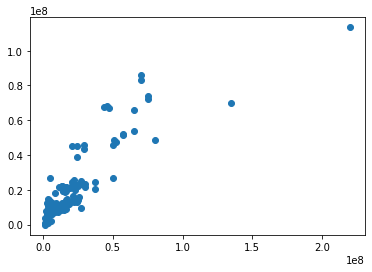

In [81]:
plt.scatter(x=y_test, y=y_pred)
plt.show()

## (2). Random Forest:--

In [82]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=100,random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [83]:
y_pred1=rf.predict(X_test)
y_pred1

array([1.69060000e+07, 1.50660000e+07, 7.48050000e+07, 1.55490000e+07,
       3.12250000e+06, 3.95490000e+07, 4.89240000e+07, 6.83450000e+07,
       1.76260000e+07, 4.13300000e+06, 3.96260000e+07, 1.06429000e+07,
       1.78460000e+07, 5.79090000e+07, 5.43750000e+06, 1.51640000e+07,
       2.72300000e+06, 2.80350000e+07, 4.28600000e+06, 5.35150000e+06,
       6.30975000e+07, 6.83226667e+06, 8.90900000e+06, 1.47720000e+07,
       1.84374000e+07, 1.15250000e+07, 7.78800000e+06, 2.11240000e+07,
       3.67030000e+07, 8.57840000e+06, 4.48240000e+06, 3.49610000e+07,
       5.75280000e+07, 1.78240000e+07, 6.44200000e+07, 7.34490000e+06,
       1.34699000e+07, 1.36520000e+07, 4.81570000e+06, 2.18860000e+07,
       1.15080000e+07, 2.92806000e+07, 5.20040000e+06, 1.45749000e+07,
       9.54800000e+07, 4.39210000e+07, 6.95050000e+07, 1.51070000e+07,
       4.81840000e+06, 4.27900000e+06, 2.87550000e+07, 2.00585000e+07,
       1.29820000e+07, 1.78195000e+08, 6.55650000e+07, 1.82270000e+07,
      

In [84]:
r2_score(y_test,y_pred1)

0.907415463191185

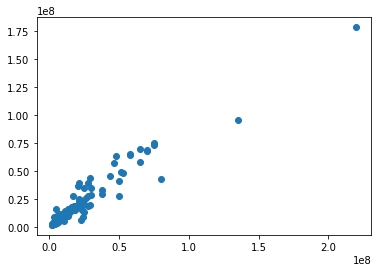

In [85]:
plt.scatter(x=y_test, y=y_pred1)
plt.show()

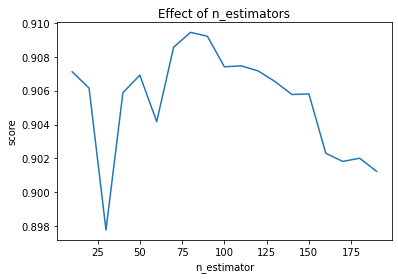

In [86]:
# Try different numbers of n_estimators - this will take a minuteestimators = np.arange(10, 200,10)
scores = []
for n in estimators:
    rf.set_params(n_estimators=n)
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

## (3). KNeighbours:--

In [87]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(X_train, y_train)

KNeighborsRegressor()

In [88]:
y_pred2=knr.predict(X_test)
y_pred2

array([1.5460e+07, 1.2620e+07, 6.4100e+07, 1.4360e+07, 4.3100e+06,
       3.8800e+07, 4.5820e+07, 1.0310e+08, 2.0200e+07, 8.3400e+06,
       3.9460e+07, 1.6540e+07, 2.6400e+07, 4.9000e+07, 4.9600e+06,
       1.2060e+07, 4.7700e+06, 1.9500e+07, 3.5000e+06, 9.4800e+06,
       6.6000e+07, 1.1660e+07, 7.9400e+06, 1.4180e+07, 1.9600e+07,
       9.9800e+06, 6.8940e+06, 2.4300e+07, 3.4240e+07, 8.7000e+06,
       6.3180e+06, 3.3800e+07, 6.1300e+07, 2.1640e+07, 5.7900e+07,
       1.2898e+07, 8.7000e+06, 1.0480e+07, 1.2200e+07, 2.4300e+07,
       1.4020e+07, 2.2800e+07, 7.6400e+06, 1.5380e+07, 5.4400e+07,
       4.3398e+07, 5.8100e+07, 1.2880e+07, 4.0340e+06, 3.9800e+06,
       2.6360e+07, 3.8798e+07, 1.2120e+07, 1.0210e+08, 5.7900e+07,
       1.6840e+07, 1.2620e+07, 2.9800e+06, 1.8620e+07, 1.2900e+07,
       5.4600e+06, 4.0740e+07, 1.7540e+07, 1.7500e+07, 8.9200e+06,
       1.0320e+07, 1.9600e+06, 1.8380e+07, 1.4200e+07, 6.2200e+06,
       6.5780e+07, 3.2200e+06, 2.5900e+07, 1.5840e+07, 1.2300e

In [89]:
r2_score(y_test,y_pred2)

0.6790067249981089

## (4). Gradient Boosting:--

In [90]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor(loss='ls',n_estimators=800,subsample=0.1,
criterion='mse',max_features='auto',min_samples_leaf=5, 
min_samples_split=4, max_leaf_nodes=40, learning_rate=0.05, max_depth=20, random_state=2, n_iter_no_change=5)

In [91]:
GB.fit(X_train, y_train)
y_pred3 = GB.predict(X_test)


In [92]:
r2_score(y_test,y_pred3)

0.7334366049513594

In [106]:
final

,Area,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft,0,1,2,3,4,5,6,7
0,2700.0,1,1.0,60000000,1,0,1,22222.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1500.0,1,1.0,14900000,1,1,0,9933.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1850.0,1,1.0,15500000,1,1,0,8378.378378,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1380.0,1,1.0,15000000,1,1,0,10869.565217,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1550.0,1,1.0,13200000,1,1,0,8516.129032,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,850.0,0,1.0,5700000,1,1,1,6706.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1156,713.0,1,1.0,6000000,1,0,1,4444.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1157,675.0,0,2.0,16000000,1,1,1,22857.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1158,540.0,2,2.0,1500000,1,1,1,2778.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
X_train, y_train = final.drop("Per_Sqft", axis=1), final.Per_Sqft
X_valid, y_valid = final.drop("Area", axis=1), final.Area

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1160, 15), (1160,), (1160, 15), (1160,))

In [110]:

# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

In [111]:

%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [1000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Vivek Kumar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vivek Kumar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vivek Kumar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 343, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\Vivek Kumar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 104, in _get_n_samples_bootstrap
    raise ValueError(msg.format(n_samples, max_samples))
ValueError: `max_samples` must be in range 1 to 928 but got value 1000

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Vivek Kumar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\Vivek Kumar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vivek Kumar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vivek Kumar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 343, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\Vivek Kumar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 104, in _get_n_samples_bootstrap
    raise ValueError(msg.format(n_samples, max_samples))
ValueError: `max_samples` must be in range 1 to 928 but got value 1000

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Vivek Kumar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\Vivek Kumar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vivek Kumar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vivek Kumar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 343, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\Vivek Kumar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 104, in _get_n_samples_bootstrap
    raise ValueError(msg.format(n_samples, max_samples))
ValueError: `max_samples` must be in range 1 to 928 but got value 1000

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Vivek Kumar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\Vivek Kumar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vivek Kumar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vivek Kumar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 343, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\Vivek Kumar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 104, in _get_n_samples_bootstrap
    raise ValueError(msg.format(n_samples, max_samples))
ValueError: `max_samples` must be in range 1 to 928 but got value 1000

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Vivek Kumar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

Wall time: 883 ms


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [1000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [112]:
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 6,
 'min_samples_leaf': 17,
 'max_samples': 1000,
 'max_features': 'auto',
 'max_depth': None}

In [113]:
show_scores(rs_model)


{'Training MAE': 6867.762786661481,
 'Valid MAE': 14395.061613437318,
 'Training RMSLE': 0.5679993010332399,
 'Valid RMSLE': 2.7539576296280432,
 'Training R^2': 0.21857670828593445,
 'Valid R^2': -98.12612844403156}

In [115]:
%%time
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=17,
                                    min_samples_split=6,
                                    max_features=0.5,
                                    max_samples=1000,
                                   max_depth=0.1)
ideal_model.fit(X_train, y_train)

Wall time: 92.1 ms


RandomForestRegressor(max_depth=0.1, max_features=0.5, max_samples=1000,
                      min_samples_leaf=17, min_samples_split=6,
                      n_estimators=40)

In [116]:
show_scores(ideal_model)

{'Training MAE': 8965.01529103234,
 'Valid MAE': 13364.89629311182,
 'Training RMSLE': 0.7798650741164337,
 'Valid RMSLE': 2.6856143853291154,
 'Training R^2': -0.00011104353806534739,
 'Valid R^2': -84.21713734559575}